# Code First, Math Later
## Learning Neural Nets Through Implementation and Examples
### Kyle Shaffer

# Overall Approach
* Many people start with textbooks to learn theory and fundamentals before moving on to application
* Fundamental texts often use math as their main tool
* Mathematics and formal notation can be abstract and difficult to understand

# Overall Approach
* We can instead combine fundamentals with examples in an iterative approach
* Recent deep learning libraries have made prototyping much easier, but these tools can also be used to learn about neural networks prior to application
* We can learn about DL techniques through "picking apart" existing software

# Talk Overview
* Overview of Deep Learning and Applications
* Introduction to Keras API
* Implementing Neural Networks
* Beyond the Black Box: Investigating Feature Extraction Layers
* Conclusion

## We'd like to go from this....
$$i = \sigma(x_{t}U^i + s_{t-1}W^i)$$
$$f = \sigma(x_{t}U^f + s_{t-1}W^f)$$
$$o = \sigma(x_{t}U^o + s_{t-1}W^o)$$
$$g = \tanh(x_{t}U^g + s_{t-1}W^g)$$
$$c_{t} = c_{t-1} \cdot f + g \cdot i$$
$$s_{t} = \tanh(c_{t}) \cdot o$$

## To this!

In [ ]:
model = Sequential()
model.add(LSTM(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Quick Intro to Deep Learning

# Feedforward Networks

# Feedforward Networks
* __Deep learning__ = models that represent data hierarchically in order to make a prediction
* Deeper layers in this hierarchy automatically identify more general / abstract features
* Traditional ML feature engineering vs. DL architecture engineering
* __Feedforward nets__ = prototypical example of deep networks

<p align="center">
<img src="figs/neural-network.png"/>
</p>

# Feedforward Networks
## Some vocab...
* **_layers_**: arrangements of neurons/cells with no lateral connections
* **_activation function_**: non-linear function that modifies values of a vector and passes these values to a subsequent layer
* **_"deep" network_**: neural network with several layers stacked on top of one another
* **_hidden layer_**: layer in a neural network that is neither the input or output layer (in the middle)

# Feedforward Networks
## Some vocab...
* **_multilayer perceptron_**: another term for feedforward networks
* **_activation function_**: non-linear function that manipulates vector before passing it to subsequent layers

In [28]:
# Most activation functions are not that difficult to implement
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def relu(vector):
    return np.maximum(0, vector)

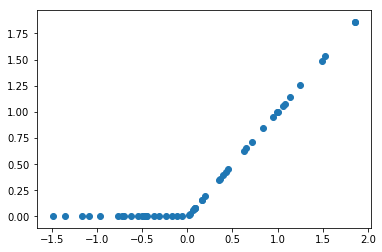

In [29]:
original_vec = np.random.normal(size=50)
relu_vec = relu(original_vec) # Call activation function
plt.scatter(original_vec, relu_vec) # Plot both

# Feedforward Networks
* Often think of hidden layers as "feature extractors" or "data transformers"
* These layers have their weights adjusted through the training process, and they "learn" representations that are good for a predictive task
* Different way of thinking from traditional process of manually engineering features before feeding to model
* Deeper networks can represent more abstract aspects of data by combining simpler features from previous layers

# Feedforward Networks

<tr>
    <td> <img src="figs/neural-network.png" alt="" style="width: 700px;"/> </td>
    <td> <img src="figs/mlp_code.png" alt="" style="width: 700px;"/> </td>
</tr>

# Feedforward Networks
* Building block for all other flavors of networks
* Help us understand at building architectures at a high level
* Intro to example of feature learning and hierarchical data representation

# Convolutional Networks

# Convolutional Networks
* Often used in image tasks
* Idea of using a "sliding filter" to aggregate features over an image
* Network passes learned feature representations to following layers
* Each subsequent convolutional layer learns more general / abstract concepts

# Convolutional Networks
![conv-layers](figs/conv_layers.png)

## What's a convolution?

In [1]:
import numpy as np

edge_filter = np.array([
    [1, 0, -1], 
    [0, 0, 0],
    [-1, 0, 1]
])

In [2]:
# Convolution function
# Here, we're detecting edges in an image

def convolve(input_image, kernel):
    padded_image = np.pad(input_image, (1, 1), 'constant') # 1-pixel padding added to image
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    convolved_image = np.zeros_like(input_image) # Store the convolved image in NumPy array
    for i in xrange(padded_image.shape[0] - kernel_width + 1):
        for j in xrange(padded_image.shape[1] - kernel_height + 1):
            # Extract an image chunk of size kernel_width x kernel_height
            temp_array = padded_image[i: i+kernel_width, j: j+kernel_height]
            conv_val = np.sum(temp_array * kernel)
            # Clip values outside the 0 - 255 range
            if conv_val < 0:
                push_val = 0
            elif conv_val > 255:
                push_val = 255
            else:
                push_val = conv_val
            convolved_image[i, j] = push_val
    return convolved_image

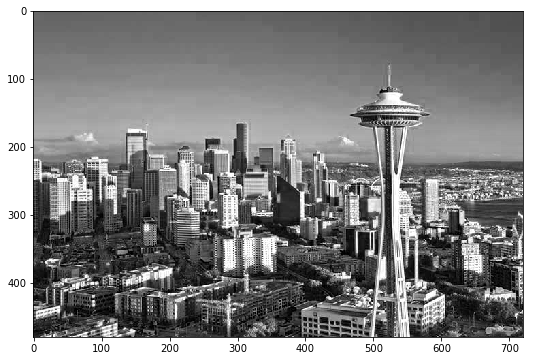

In [3]:
# Let's read in an image and view it
from PIL import Image
import matplotlib.pyplot as plt
% matplotlib inline

img = np.array(Image.open("figs/space_needle2.png"))
single_channel_img = img[:, :, 0]
plt.figure(figsize=(10, 6))
plt.imshow(single_channel_img, plt.get_cmap('gray'))

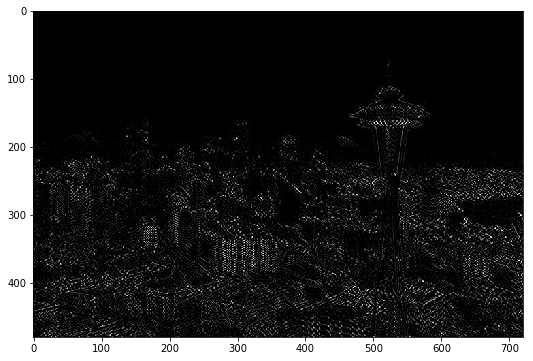

In [4]:
img_edges = convolve(single_channel_img, edge_filter)
plt.figure(figsize=(10, 6))
plt.imshow(img_edges, plt.get_cmap('gray'))

## What's a convolution?
![conv-img](figs/convolution.gif)
Source: Source: http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution

# Convolutional Networks
* Models that use convolutions as a way to construct summaries of local patches of images
* Learn to represent hierarchies of image features that are good for prediction
* Popular in computer vision, also applicable in NLP

# Recurrent Networks

# Recurrent Networks
* Capture sequential dependencies in data
* Often used for language / text data or time series
* Learn a "cell state" that represents relationships between items in input sequence
* These come in several flavors (GRU, LSTM, Bidirectional RNN)
* Caveats: can take very long time to train, optimization can be tricky

![lstm-unrolled](figs/lstm_unrolled.png)
Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

![inside-lstm](figs/inside_lstm.png)
Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

![lstm-anim](figs/lstm_animation.gif)

# Introduction to Keras

## Keras Homepage
https://keras.io/
![keras-homepage](figs/keras_homepage.png)

# Introduction to Keras
* Abstracts implementation details
* Allows for quick prototyping
* Think in terms of "stacking layers"

In [ ]:
# General pattern of writing Keras models

# (1) Start a "container" of model layers
# (2) Add initial input and feature extraction layers
# (3) Finally add output layer for final predictions

In [ ]:
# (1) Start a "container" of model layers
model = Sequential()

# (2) Add initial input and feature extraction layers
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))

# (3) Finally add output layer for final predictions
model.add(Dense(1))
model.add(Activation('sigmoid'))

## Models Module
* Choice of two API's to construct network
* **Sequential**: procedural style of stacking layers
* **Functional**: functional (surprise!) style of building networks as sequences of functions
    * Build a sequence of functions that operate in nested fashion, and define network as input and output functions
* We'll focus on the **Sequential** API for this talk

## Layers Module
* Store of classes for building model layers
* Used with either API
* Most common for feature extraction: `Conv2D`, `LSTM`, `GRU`, `MaxPooling2D`, `Dense`
* Other common layers: `Activation`, `Embedding`

## Overview of Keras
* Allows us to prototype and construct architectures quickly
* Nice data preprocessing tools and pre-loaded datasets
* Can be easy to treat networks as "black boxes"

# Implementing Neural Nets: Examples

# CNN for Object Recognition

## Keras Datasets
https://keras.io/datasets/
![Datsets](figs/keras_datasets.png)

In [39]:
# Let's load the data we'll use
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load in data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Need to create one-hot matrix of labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print "Training data:", X_train.shape
print "Training labels:", y_train.shape

Training data: (50000, 32, 32, 3)
Training labels: (50000, 10)


(32, 32, 3)


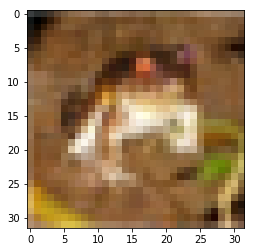

In [40]:
# Input tensor is just a collection of 3D tensors
# Each is an image with 3 color channels
X_train = np.array([img / 255. for img in X_train]) # Min-max normalization
first_img = X_train[0, :, :, :]
print first_img.shape
# A frog I think?
plt.imshow(first_img)

In [7]:
# Imports for the model
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten
from keras.layers import Conv2D, Dense, MaxPooling2D

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# More convolution feature extraction layers
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten extracted features to a vector
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1]))
# Use `softmax` as our activation since we're predicting 10 classes
model.add(Activation('softmax'))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])

In [ ]:
# Train!
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
25000/25000 [==============================] - 249s - loss: 1.7588 - acc: 0.3604     

In [36]:
from keras.models import load_model
model = load_model('../data/cifar_cnn.h5')

## Convolutional Networks
* We can rely on performance metrics to assess model
* Sometimes we need more nuanced debugging options
* Image networks lend themselves nicely to qualitative exploration
* Let's visualize model confidence on particular images

In [42]:
def visualize_predictions(model, img):
    prediction_img = np.expand_dims(img, axis=0)
    classes = range(10)
    class_names = ['airplane', 'car', 'bird', 'cat',
                  'deer', 'dog', 'frog', 'horse', 'ship',
                  'truck']
    probabilities = model.predict(prediction_img)[0]
    prediction_dict = dict(zip(classes, probabilities))
    plt.figure(figsize=(10, 6))
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    plt.bar(classes, probabilities, align="center")
    plt.xticks(classes, class_names, rotation="vertical")
    plt.show()

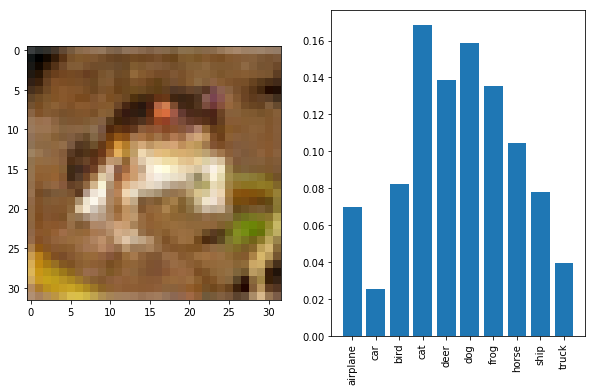

In [47]:
# We've got some work to do...
visualize_predictions(model=model, img=first_img)

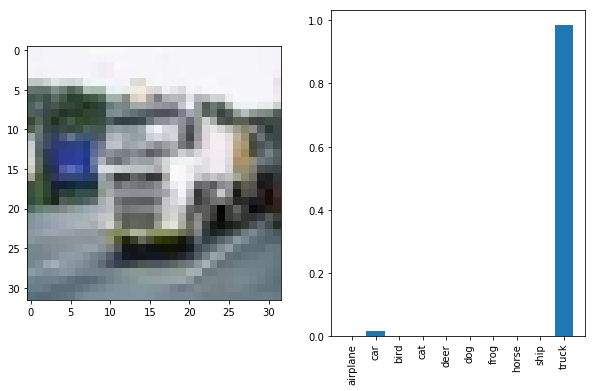

In [46]:
# Pick another random image
img = X_train[1000]
# Better results!
visualize_predictions(model=model, img=img)

In [48]:
# Sanity checking - we got it right!
y_train[1000]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

## Convolutional Nets - Going Forward
* Add convolutinal layers for deeper nets (if you have compute power)
* Different optimizers and learning rates
* Confusion matrices to understand model mistakes
* Use output probabilities and above plotting function to home in on predictions where classifier is not confident

# LSTM for Document Classification

# LSTM for Document Classification
* For text, often most time needs to be spent in data munging and formatting
* We can't feed raw text to a model, so we need to transform the text into a numerical format the model can ingest
* Typical transformation pipeline:
    * Tokenize our text
    * Convert words to vocabulary ID's
    * Each document is now a sequence of integers (ID's)
    * Our training set is then a matrix with rows as documents, and columns as word ID's

In [2]:
import pandas as pd

data_path = "../data/socialmedia-disaster-tweets.csv"
df = pd.read_csv(data_path)
print df.shape
df.head()

(10860, 2)


,choose_one,text
0,Relevant,Just happened a terrible car crash
1,Relevant,Our Deeds are the Reason of this #earthquake M...
2,Relevant,"Heard about #earthquake is different cities, s..."
3,Relevant,"there is a forest fire at spot pond, geese are..."
4,Relevant,Forest fire near La Ronge Sask. Canada


In [3]:
df.choose_one.value_counts()

Not Relevant    6187
Relevant        4673
Name: choose_one, dtype: int64

In [4]:
df['int_label'] = 0
df.loc[df.choose_one == 'Relevant', 'int_label'] = 1
df.head()

,choose_one,text,int_label
0,Relevant,Just happened a terrible car crash,1
1,Relevant,Our Deeds are the Reason of this #earthquake M...,1
2,Relevant,"Heard about #earthquake is different cities, s...",1
3,Relevant,"there is a forest fire at spot pond, geese are...",1
4,Relevant,Forest fire near La Ronge Sask. Canada,1


In [5]:
# Text Processing
X_text = df.text.tolist()
X_text[:10]

['Just happened a terrible car crash',
 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
 'Apocalypse lighting. #Spokane #wildfires']

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

y = df.int_label.values

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_text)
sequences = tokenizer.texts_to_sequences(X_text)
X_padded = pad_sequences(sequences)
print "Shape of input sequences:", X_padded.shape
print "First element of data:", X_padded[0]

Using TensorFlow backend.


Shape of input sequences: (10860, 32)
First element of data: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0   32  821    5 1586
  131   97]


## LSTM's - Working with Sequences
* Each document is transformed into a sequence of integers
* Each integer in each document can be thought of as a "word ID"
* Since not all documents are same length, we prepend each vector with zeros to the max. document length
* In other domains, you may have real-valued sequences (e.g. time series modeling)

In [8]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, LSTM

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index), output_dim=100))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Different loss

In [ ]:
import json
model.fit(X_padded, y, epochs=10, batch_size=32)
model.save("../data/lstm.h5")
with open("word_index.json", "r") as outfile:
    json.dump(tokenizer.word_index, outfile)

Epoch 1/10
10860/10860 [==============================] - 78s - loss: 0.5007 - acc: 0.7550      

## LSTM for Text - Going Forward
* Try more recurrent layers (this can mkae training SLOW)
* Different recurrent units (LSTM, GRU, vanilla RNN)
* Pre-trained embeddings in your embedding layer (Word2Vec vs. Glove)

# Beyond the Black Box: Investigating Feature Extraction Layers

## Architecture Debugging

In [50]:
# Building our model architecture...
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, LSTM

def build_lstm_model():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    # Recurrent layers
    model.add(LSTM(64))
    model.add(LSTM(64)) # Let's make a deeper LSTM!
    # Additional fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    # Layer that actually does the classification
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    return model

In [51]:
# Cool, let's build our model so we can use it - oh wait...
lstm_model = build_lstm_model()

ValueError: Input 0 is incompatible with layer lstm_4: expected ndim=3, found ndim=2

In [52]:
def build_lstm_feature_extractor():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    model.add(LSTM(64))
    # In principle, this last step doesn't make much sense
    # But, we need to compile a model in order to play with it
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    return model

In [53]:
import numpy as np

partial_model = build_lstm_feature_extractor()
# Let's make some fake data
X_fake = np.array([np.random.randint(low=0, high=1, size=100) 
                   for _ in xrange(100)])
print "Shape of our fake data:", X_fake.shape

lstm_features = partial_model.predict(X_fake)
print "Shape of feature data from first LSTM layer:", lstm_features.shape

Shape of our fake data: (100, 100)
Shape of feature data from first LSTM layer: (100, 64)


In [54]:
# Turns out there's an easy fix - `return_sequences` parameter in first LSTM layer
def build_lstm_feature_extractor():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    model.add(LSTM(64, return_sequences=True)) # <- Now we're returning a sequence of vectors
    # In principle, this last step doesn't make much sense
    # But, we need to compile a model in order to play with it
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    return model

lstm_model = build_lstm_feature_extractor()
lstm_features = lstm_model.predict(X_fake)
print "New shape of data:", lstm_features.shape

New shape of data: (100, 100, 64)


In [55]:
def build_fixed_lstm():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    # Recurrent layers
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(64)) # Let's make a deeper LSTM!
    # Additional fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    # Layer that actually does the classification
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    return model

fixed_lstm = build_fixed_lstm()
print "Built model successfully!"

Built model successfully!


## Architecture Debugging
* Common issue - mismatch between incoming data and expected data
* Single out the layer throwing the error
* Pass data through network up until that point
* Back to docs to look for options / examples to modify
* Common in CNN's with missing `Flatten()`  layer

## Understanding Data Flow Through the Network

## Understanding Data Flow Through the Network
* Input an output may be fairly clear at this point
* **Input**: matrix or tensor of data instances
* **Output**: vector or matrix of size `num_instances` `x` `num_classes`
* What about hidden layers / data transformers?

In [59]:
# We can employ the "partial network" idea above
# to understand the shape of our data at each step
def show_data_flow(input_data):
    model = Sequential()
    layer_list = [Embedding(input_dim=2000, output_dim=200, input_length=100),
                 LSTM(64),
                 Dense(128, activation='relu'),
                 Dense(4, activation='softmax')]
    for layer in layer_list:
        model.add(layer)
        model.compile(loss='categorical_crossentropy', optimizer='sgd')
        y_hat = model.predict(input_data)
        print "Data shape at {} layer:".format(layer.name), y_hat.shape

In [57]:
show_data_flow(X_fake)

Data shape at embedding_6 layer: (100, 100, 200)
Data shape at lstm_9 layer: (100, 64)
Data shape at dense_5 layer: (100, 128)
Data shape at dense_6 layer: (100, 4)


## Retrieving Layer Weights

In [58]:
# Keras models have a `layers` attribute that is simply
# a list containing the (wait for it) layers of your model
partial_model.layers

In [40]:
# We can also return the actual weights from these layers
lstm_weights = partial_model.layers[1].get_weights()
print type(lstm_weights)
print len(lstm_weights)

for weight_matrix in lstm_weights:
    print weight_matrix.shape

<type 'list'>
3
(200, 256)
(64, 256)
(256,)


In [41]:
# Still just NumPy arrays!
lstm_weights[0]

array([[-0.00139691,  0.06412541, -0.00728998, ...,  0.07583428,
         0.02882855,  0.0599801 ],
       [ 0.08534846,  0.0171094 , -0.07984166, ...,  0.07028192,
         0.04327398, -0.07120567],
       [-0.00677217, -0.03426547,  0.04307427, ...,  0.10646328,
         0.07360189, -0.09827101],
       ..., 
       [-0.09700623, -0.05641634, -0.00955244, ...,  0.00885451,
        -0.08707197, -0.00761497],
       [-0.066992  ,  0.06831715, -0.09680328, ..., -0.02698374,
         0.08718883,  0.02109569],
       [ 0.04942372, -0.023612  , -0.09787799, ..., -0.05172569,
         0.01122611,  0.08796722]], dtype=float32)

## Visualizing Task-Specific Embeddings

In [18]:
import json
from keras.models import load_model
model = load_model('../data/pos_tagger.h5')

embedding_weights = model.layers[0].get_weights()[0]
print embedding_weights.shape
print embedding_weights.max()
print embedding_weights.min()
print embedding_weights[np.isnan(embedding_weights)].shape
print np.isnan(embedding_weights).any()
print np.isinf(embedding_weights).any()

with open('../data/pos_word_index.json', 'r') as infile:
    word_index = json.load(infile)
    
random_words = np.random.choice(word_index.keys(), size=600, replace=False)
random_embeddings = np.array([embedding_weights[word_index[rw]] for rw in random_words])
print random_embeddings.shape
random_words[:10]

(19055, 128)
0.972303
-0.872675
(0,)
False
False
(600, 128)


array([u'386,000', u'hands-on', u'price-level', u'Companies',
       u'dependents', u'mechanism', u'clerk', u'strikingly', u'capsules',
       u'Gradison'], 
      dtype='<U43')

In [19]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, LabelSet, Label
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [26]:
word_projections = pd.read_csv('../data/word_projections.csv', index=False, encoding='utf8')

def plot_embeddings(embedding_df):
    words = embedding_df.words.tolist()
    x_coords = embedding_df.x_coord.tolist()
    y_coords = embedding_df.y_coord.tolist()
    
    source = ColumnDataSource(data=dict(x=x_coords, y=y_coords, names=words))
    p = figure(title="Task Specific Embeddings")
    p.scatter(x="x", y="y", size=8, source=source)
    labels = LabelSet(x="x", y="y", text="names", level="glyph", source=source, render_mode="canvas")
    p.add_layout(labels)
    show(p)

TypeError: parser_f() got an unexpected keyword argument 'index'

In [27]:
plot_embeddings(word_projections)

# Looking at Feature Extraction Layers
* Help conceptualize what's happening "under the hood" in our network
* May help us understand computation time at a high level
* Help us visualize what's happening with data representations
* Other applications: transfering weights from one network to another

# Recap
* We've gone over popular architectures and some fundamentals in deep learning
* Learned about Keras as a tool to implement and experiment with these architectures
* Looked at ways to "peer into" network architectures to better understand data transformations as they happen in the network

# Recap
* Taken some of the "mystery" out of neural networks
* Nothing magic - vectors, matrices, functions which can be implemented in familiar tools (NumPy)
* Iterative approach to learning about neural networks - fundamentals/theory -> practice -> repeat!

# Thanks! Questions?